In [1]:
import sys
sys.path.append('f:/seismic/code/core')
sys.path.append('/seismic/code/core')
sys.path.append('/kaggle/input/my-seis-library/')
import kaggle_support as kgs
import importlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import copy
import os
import seis_test
import seis_invert
import seis_prior
#import seis_nn
import cupy as cp
import seis_diagnostics
import seis_forward
import seis_forward2
import seis_model
import seis_numerics

F:/seismic/models/brendan/*.pth
Loading:  F:/seismic/models/brendan\unet2d_caformer_seed3_epochbest.pt
n_models: 1


In [16]:
for d in kgs.load_all_train_data(validation_only=True)[::500]:
    print(d.family)

CurveFault_A
CurveFault_B
CurveVel_A
CurveVel_B
FlatFault_A
FlatFault_B
FlatVel_A
FlatVel_B
Style_A
Style_B


In [17]:
#data=kgs.load_all_train_data(validation_only=True)[1500:2000][::2]
data=kgs.load_all_train_data(validation_only=True)[500:2000][::2] + kgs.load_all_train_data(validation_only=True)[2500:3000][::2]
np.random.default_rng(seed=0).shuffle(data)
for d in data[::50]:
    print(d.family)

CurveVel_A
CurveVel_A
CurveVel_B
CurveVel_B
CurveFault_B
CurveFault_B
CurveVel_A
CurveVel_B
CurveFault_B
FlatFault_B
CurveFault_B
FlatFault_B
CurveVel_B
CurveFault_B
CurveVel_A
CurveVel_A
CurveFault_B
FlatFault_B
CurveVel_A
CurveVel_A


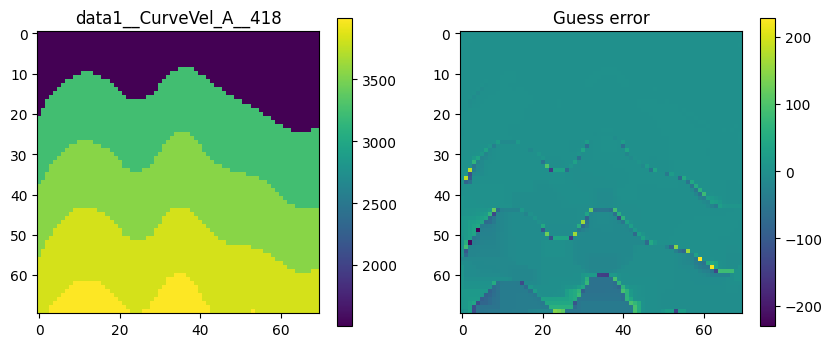

diag 7.413739765243915e-05
400


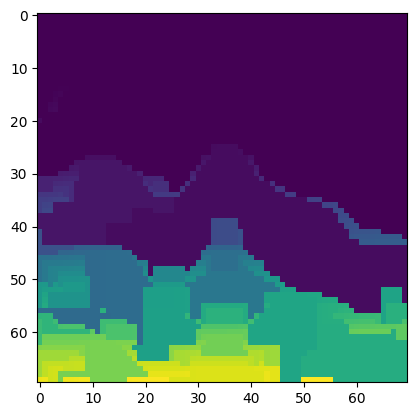

100 4277.764056738371
200 2525.874015251084
300 760.9017282057498
400 1333.1468361670634
500 1029.6641800336495
600 668.9451052718418
700 227.32871943833646
800 73.82596693650376


KeyboardInterrupt: 

In [22]:
importlib.reload(seis_prior)
importlib.reload(seis_diagnostics)
importlib.reload(seis_invert)
importlib.reload(seis_forward)
importlib.reload(seis_model)
importlib.reload(seis_numerics)
kgs.profiling=False
seis_invert.profiling=False
kgs.debugging_mode = 0
seis_forward2.profiling=False
seis_forward2.reset_profile()

# transform back on, history size to infinite, maxiter down
#model = seis_model.default_model().models[1].model_TV2D
#model.show_convergence = True
#model.iter_list = [1000]

model = seis_model.model_TV2D()
model.show_convergence=True
model.prior.λ /= 10
model.iter_list = [2000]
model.lbfgs_tolerance_grad = 100
model.cache_name = 'xxx'
model.write_cache = False
model.read_cache = False
old_prior = model.prior
# import seis_prior
model.prior = seis_prior.RestrictFlatAreas()
model.prior.underlying_prior = old_prior
model.prior.diff_threshold1 = 1.
#model.prior.diff_threshold2 = np.inf
model.prior.rrange = 1
model.prior.prep()


start_model = seis_model.model_TV2D_refine()
start_model.train([],[])

do_which_list = [False,False,True]

def param_func(model,value):        
    return model
    
param_values = [0]
param_name = "dummy"


for d in data:
    results = seis_diagnostics.do_diagnostics_run(d, model, do_which_list, param_func, param_values, param_name, help_fac=0., start_model = start_model)

In [ ]:
%debug